In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import pandas as pd

In [2]:
df = pd.read_csv('Cap.csv')

In [3]:
df.head()

,DATE,WEEK_OF_YEAR,CAMPAIGN,CAMPAIGN_TYPE,KEYWORD,NETWORK,CPC,PAGE_VIEWS,TIME_ON_SITE_TOTAL,VISITOR_BOUNCE,VISITS,POSITION,Clicks,Impressions,Media_Cost
0,2017-05-21 00:00:00,21,Non Brand | Condition | Geo,Unbranded,symptoms of asthma,Google,1.8,2.0,13.0,1.0,2.0,2.080000,3.000000,51.0000,5.400000
1,2017-05-21 00:00:00,21,Brand,Branded,product1 spacer,Google,1.8,2.0,13.0,1.0,2.0,1.000000,0.000000,2.0000,0.000000
2,2017-05-21 00:00:00,21,Non Brand | Treatment | National,Unbranded,how to prevent asthma,Google,1.8,2.0,13.0,1.0,2.0,1.480000,0.000000,4.0000,0.000000
3,2017-05-21 00:00:00,21,Non Brand | Info | Geo,Unbranded,facts about asthma,Bing,1.8,2.0,93.0,0.0,2.0,2.448832,0.728939,19.7124,1.669127
4,2017-05-21 00:00:00,21,Non Brand | Condition | Geo,Unbranded,asthma symptoms in children,Bing,1.8,1.0,2.0,0.0,1.0,2.448832,0.728939,19.7124,1.669127


In [4]:
df.columns

Index(['DATE', 'WEEK_OF_YEAR', 'CAMPAIGN', 'CAMPAIGN_TYPE', 'KEYWORD',
       'NETWORK', 'CPC', 'PAGE_VIEWS', 'TIME_ON_SITE_TOTAL', 'VISITOR_BOUNCE',
       'VISITS', 'POSITION', 'Clicks', 'Impressions', 'Media_Cost'],
      dtype='object')

In [5]:
df.groupby('CAMPAIGN_TYPE').count()

,DATE,WEEK_OF_YEAR,CAMPAIGN,KEYWORD,NETWORK,CPC,PAGE_VIEWS,TIME_ON_SITE_TOTAL,VISITOR_BOUNCE,VISITS,POSITION,Clicks,Impressions,Media_Cost
CAMPAIGN_TYPE,,,,,,,,,,,,,,
Branded,100493,100493,100493,100493,100493,100493,100493,100493,100493,100493,100493,100493,100493,100493
Unbranded,388274,388274,388274,388274,388274,388274,388274,388274,388274,388274,388274,388274,388274,388274


In [6]:
df.groupby('NETWORK').count()

,DATE,WEEK_OF_YEAR,CAMPAIGN,CAMPAIGN_TYPE,KEYWORD,CPC,PAGE_VIEWS,TIME_ON_SITE_TOTAL,VISITOR_BOUNCE,VISITS,POSITION,Clicks,Impressions,Media_Cost
NETWORK,,,,,,,,,,,,,,
Bing,177312,177312,177312,177312,177312,177312,177312,177312,177312,177312,177312,177312,177312,177312
Google,308740,308740,308740,308740,308740,308740,308740,308740,308740,308740,308740,308740,308740,308740
Yahoo,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715


In [7]:
df_new = df.drop(['DATE','WEEK_OF_YEAR','CAMPAIGN','CAMPAIGN_TYPE','KEYWORD','NETWORK'], axis=1)

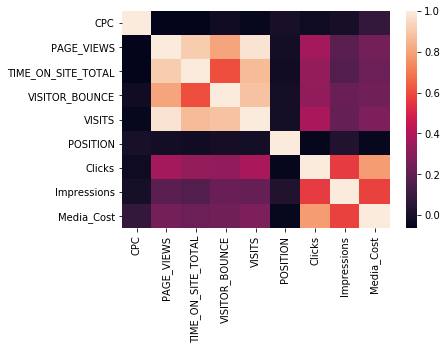

In [9]:
sb.heatmap(df_new.corr())

In [10]:
scaler = StandardScaler()
X = df_new.values
X_new = scaler.fit_transform(X)

In [11]:
pca = PCA(n_components=0.95)
pca.fit(X_new)
m = pca.transform(X_new)

In [12]:
pca.explained_variance_ratio_

array([0.44962463, 0.20099246, 0.11217744, 0.11080965, 0.05459217,
       0.04332872])

In [13]:
pca.components_

array([[-0.02279017,  0.46022473,  0.4197459 ,  0.41348243,  0.46704412,
        -0.01299635,  0.31561174,  0.22413128,  0.26902553],
       [ 0.09167066, -0.25133085, -0.23889188, -0.19667725, -0.23640698,
        -0.02986168,  0.47500306,  0.50096972,  0.54708269],
       [ 0.50635179,  0.00890812, -0.0099902 ,  0.05299527,  0.02241217,
         0.85545338, -0.06970964,  0.05873105, -0.00294079],
       [-0.84987925, -0.02187173, -0.00660063, -0.05071715, -0.03046187,
         0.50235974,  0.05272799,  0.13027509, -0.03957303],
       [ 0.01997162, -0.04931101, -0.20279124,  0.30801729,  0.05319043,
        -0.11919719, -0.39067159,  0.75791135, -0.34216885],
       [ 0.06916297,  0.13271664,  0.61556347, -0.67459663, -0.07269556,
        -0.0235779 , -0.11896526,  0.31963259, -0.14644281]])

In [15]:
import numpy as np
most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]

In [16]:
feature_names = df_new.columns

In [17]:
most_important_names = [feature_names[most_important[i]] for i in range(pca.components_.shape[0])]

In [18]:
most_important_names

['VISITS', 'Media_Cost', 'POSITION', 'CPC', 'Impressions', 'VISITOR_BOUNCE']

In [19]:
xvector = pca.components_[0]
yvector = pca.components_[1]

In [20]:
xs = m[:,0]
ys = m[:,1]

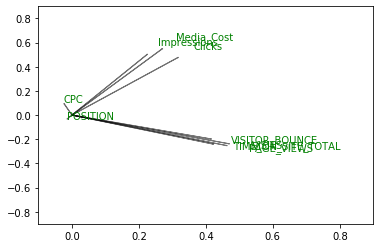

In [22]:
import matplotlib.pyplot as plt 

for i in range(len(xvector)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, xvector[i], yvector[i], color='k', alpha=0.5)
    plt.text(xvector[i]*1.15, yvector[i]*1.15, feature_names[i], color='g')

plt.xlim(-0.1,0.9)
plt.ylim(-0.9,0.9)

plt.show()